# Тема "Метод опорных векторов"

Данный метод также применяется для решения задачи классификации. В рассматриваемом примере мы продолжим классифицировать пациентов.

In [1]:
import pandas as pd # Загрузим библиотеки, которые нам потребуются
from sklearn.preprocessing import StandardScaler    

In [2]:
df = pd.read_csv('Модуль 2_Тема 4. Онкология.csv') # загрузим данные из файла

In [3]:
df.head() #Посмотрим на наши данные, видно, что заголовки столбцов отсутствуют.

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
df.info() #посмотрим на сводную информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [5]:
df.columns = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
                                      "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
                                      "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
                                      "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                                      "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst",
                                      "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
                                      "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst",
                                      "fractal_dimension_worst"]

In [6]:
df.head(20) #Посмотрим на наши данные еще раз, видно, что заголовки появились.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [7]:
df.info() #посмотрим на сводную информацию еще раз

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

Видно, что целевая переменная 'diagnosis' должна быть перекодирована в числовой формат. Ниже приведена функция, которая сделает все это, включая все наши предыдущие действия. Также в ней будет выполнена нормализация данных при помощи функции StandardScaler().

In [8]:
def load_data(data_path): #задаем функцию
     ds = pd.read_csv(data_path, names=["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
                                      "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
                                      "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
                                      "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                                      "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst",
                                      "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
                                      "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst",
                                      "fractal_dimension_worst"]) #прописываем названия столбцов
     y = ds['diagnosis'] #выделяем целевую переменную из общего объема данных
     X = ds.drop('diagnosis', axis=1) #удаляем целевую переменную из обучающего множества
     X = X.drop('id', axis=1) #удаляем не информативный столбец 'id'
     i = len(X.columns)
     X = X.drop(X.columns[i - 1], axis=1) #удаляем не информативный столбец 'fractal_dimension_worst'
     y.replace(('M', 'B'), (1, 0), inplace=True) #делаем замену значений в целевой переменной на 0 и 1
     sc = StandardScaler() #выполняем нормализацию данных, после чего наши данные преобразуются 
                           #из структуры датафрейм в обычный массив
     sc.fit(X)
     X_ans = sc.transform(X)
     return X_ans, y

In [9]:
X, y = load_data("Модуль 2_Тема 4. Онкология.csv") #Применяем написанную функцию для обработки данных из файла
# У нас сразу получаются два множества

In [10]:
X #Посмотрим как выглядит теперь множество Х, данные после нормализации не похожи на исходные значения

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.10952635,
         2.29607613,  2.75062224],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.14674897,
         1.0870843 , -0.24388967],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  0.85497394,
         1.95500035,  1.152255  ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.3267666 ,
         0.41406869, -1.10454895],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  3.19760468,
         2.28998549,  1.91908301],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.30583065,
        -1.74506282, -0.04813821]])

In [11]:
from sklearn.model_selection import train_test_split
# импортируем функцию, которая поможет нам разбить наши данные на обучающую и тестовую выборки.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Получили четыре множества: два для обучения, другие два - для тестирования.

In [13]:
from sklearn import svm #импортируем нашу модель

In [14]:
best_model = svm.SVC(kernel='linear', C=1, gamma=1) #зададим начальные параметры для моделиz

In [15]:
best_model.fit(X_train , y_train) #выполним обучение модели при начальных параметрах

SVC(C=1, gamma=1, kernel='linear')

Здесь видно, какие параметры задали мы, а какие параметры, также входящие в модель, были заполнены значениями по умолчанию.
Попробуйте задать все значения по умолчанию (то есть не прописывать никаких значений в строке:
best_model = svm.SVC(kernel='linear', C=1, gamma=1)) и посмотрите что получится.

In [16]:
from sklearn.model_selection import GridSearchCV # В этот раз тоже используем полный перебор параметров

In [17]:
model_params = best_model.get_params() #зададим параметры по которым и будем осуществлять поиск
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['gamma'] = range(1, 100)
clf = GridSearchCV(best_model, tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [18]:
from sklearn import metrics              # импортируем метрики
best_model = svm.SVC(**best_params)      # задаем найденные наилучшие параметры
best_model.fit(X_train, y_train)         # обучаем модель
predicted = best_model.predict(X_test)   # делаем предсказание

In [19]:
print('Used params:', best_params)       # выведем наилучшие параметры
print('Evaluation:\n', metrics.classification_report(y_test, predicted))
#лучшие значения метрик (те значения, которые поулчаются при наилучших параметрах модели)

Used params: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



Как видим точность повысилась по сравнению с предыдущим методом. При этом мы с вами перебирали значения параметра "gamma", изменяя его от 1 до 100 и подбирая такое значение, при котором ошибка была бы минимальной.
Поскольку мы не знаем изначально какие именно параметры нужно подбирать чтобы получить наилучший результат, то можно проводить подобный поиск несколько раз.
Модифицируем код и выполним поиск по другим параметрам. При этом все наши команды мы разместим в одной исполняемой строчке.

In [20]:
model=svm.SVC()

params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}

model_svm = GridSearchCV(model, param_grid=params, n_jobs=-1)
model_svm.fit(X_train,y_train)

print("Best Params:\n",model_svm.best_params_)

prediction=model_svm.predict(X_test)

print("Report:\n",metrics.classification_report(prediction,y_test))

Best Params:
 {'C': 6, 'kernel': 'rbf'}
Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Как видим мы получили аналогичные значения, изменяя другие параметры модели. Это говорит о стабильности получаемого решения.
Также необходимо отметить тот факт, что не какой-то единой и только одной правильной формы подбора параметров. Если вы сравните эти два кусочка кода, то заметите, что они написаны немного по-разному, но при этом работают одинаково.

Давайте посмотрим сколько же ошибок сейчас делает наша модель. Для этого построим матрицу ошибок.

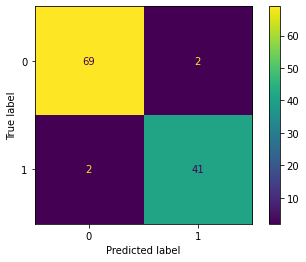

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_svm.fit(X_train, y_train), X_test, y_test)
plt.show()

Как видим из построенной матрицы ошибок построенная модель делает 4 ошибки (всего же строчек у нас 114), то есть правильно классифицированы 110 пациентов.
Постройте матрицу ошибок для других моделей и сравните с ее помощью те результаты, которые мы получаем используя различные модели.